In [5]:
from scipy.spatial.distance import mahalanobis
import scipy as sp
import pandas as pd
import dill
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# dill.dump_session('RajendraNagar.db')
dill.load_session('RajendraNagar.db')

In [42]:
df = pd.read_excel('AAP- feature engineering.xlsx')
df.head()

,Locality,Part No,Male,Female,Coffee Shops,Salon,Buy/per sqft,Rent/per sqrt,Young Women %
0,Pandav Nagar,1,521,566,8,0,7530.0,31.96,34.45230
1,Pandav Nagar,2,579,513,8,0,7530.0,31.96,42.10526
2,Pandav Nagar,3,452,401,8,0,7530.0,31.96,40.89776
3,Pandav Nagar,4,446,459,8,0,7530.0,31.96,34.85839
4,Pandav Nagar,5,521,457,7,0,7530.0,31.96,44.85777


In [60]:
df = df.dropna(subset=['Buy/per sqft'])
# df['Buy/per sqft'].isnull().sum
# x = df.iloc[:,4:7]
df.info()
# x


<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 156
Data columns (total 10 columns):
Locality         140 non-null object
Part No          140 non-null int64
Male             140 non-null int64
Female           140 non-null int64
Coffee Shops     140 non-null int64
Salon            140 non-null int64
Buy/per sqft     140 non-null float64
Rent/per sqrt    135 non-null float64
Young Women %    137 non-null float64
ditance          140 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 12.0+ KB


In [4]:
x = df.iloc[:,4:7]

Sx = x.cov().values
Sx = sp.linalg.inv(Sx)

mean = x.mean().values

print('Mean :', mean)
print('Inverce Covariance :\n ', Sx)

Mean : [2.35714286e+00 1.64285714e+00 1.30683143e+04]
Inverce Covariance :
  [[ 2.18173301e-01  6.62400042e-03 -1.32665399e-05]
 [ 6.62400042e-03  2.13447797e-01 -1.28157263e-06]
 [-1.32665399e-05 -1.28157263e-06  8.28973290e-09]]


In [3]:
def mahalanobisR(X,meanCol,IC):
    m = []
    for i in range(X.shape[0]):
        m.append(mahalanobis(X.iloc[i,:],meanCol,IC))
    return(m)

mR = mahalanobisR(x,mean,Sx)
mR

[2.908689439619985,
 2.908689439619985,
 2.908689439619985,
 2.908689439619985,
 2.468040125018581,
 2.468040125018581,
 2.468040125018581,
 2.468040125018581,
 2.468040125018581,
 2.468040125018581,
 2.468040125018581,
 2.383074790741483,
 2.468040125018581,
 3.0503330642241817,
 1.9253414344508226,
 1.9253414344508226,
 2.5118031956917735,
 1.9965255397512074,
 2.1967821897614566,
 1.6007685052534042,
 1.6007685052534042,
 1.7630442984131203,
 2.114850574420333,
 1.6007685052534042,
 2.114850574420333,
 2.114850574420333,
 4.154565203027602,
 1.7092747307538831,
 2.661269724477738,
 4.529411734236343,
 1.3682168265400596,
 0.996365836011407,
 1.4411521494902444,
 2.155512009010802,
 0.7557014597010852,
 1.0758990213950854,
 1.3058732943524842,
 1.9535192305394644,
 2.1484459034101944,
 0.8202280124636572,
 0.9822323013906185,
 1.0970908590576334,
 1.543389227622294,
 0.8902312114157422,
 0.553786700695959,
 1.3450699043605434,
 1.1120655553688528,
 1.083355429091918,
 1.1938272460386

In [216]:
df['distance'] = mR
df.head()

,Locality,Part No,Male,Female,Coffee Shops,Salon,Buy/per sqft,Rent/per sqrt,Young Women %,ditance,distance
0,Pandav Nagar,1,521,566,8,0,7530.0,31.96,34.45230,2.908689,2.908689
1,Pandav Nagar,2,579,513,8,0,7530.0,31.96,42.10526,2.908689,2.908689
2,Pandav Nagar,3,452,401,8,0,7530.0,31.96,40.89776,2.908689,2.908689
3,Pandav Nagar,4,446,459,8,0,7530.0,31.96,34.85839,2.908689,2.908689
4,Pandav Nagar,5,521,457,7,0,7530.0,31.96,44.85777,2.468040,2.468040


In [217]:
df.to_excel('fuishfu.xlsx')

In [223]:
df1 = pd.read_excel('fuishfu.xlsx')
# df1.reset_inex()
dist = df1['distance']
buy = df1['Buy/per sqft']
# buy = buy.reset_index()
# dist = dist.reset_index()
df1.head()

,Locality,Part No,Male,Female,Coffee Shops,Salon,Buy/per sqft,Rent/per sqrt,Young Women %,distance
0,Pandav Nagar,1,521,566,8,0,7530,31.96,34.45230,2.908689
1,Pandav Nagar,2,579,513,8,0,7530,31.96,42.10526,2.908689
2,Pandav Nagar,3,452,401,8,0,7530,31.96,40.89776,2.908689
3,Pandav Nagar,4,446,459,8,0,7530,31.96,34.85839,2.908689
4,Pandav Nagar,5,521,457,7,0,7530,31.96,44.85777,2.468040


In [224]:
# ind = df1.index[df1.ditance == df1['ditance'].min()]
# buy = df1['Buy/per sqft']
# ind = np.argmin(dist)
ind = dist.idxmin()

# print('Indexe :', ind)

mat = [0]*len(buy)

for i in range(len(buy)):
    if (buy.iloc[i]) < (buy.iloc[ind]):
        mat[i] = ((-1) * df1['distance'].iloc[i])
    else:
        mat[i] = df1['distance'].iloc[i]

In [225]:
# df1['ditance']
df1['m_dist'] = mat
df1.to_excel('Rajendra_data.xlsx')
# df1['ditance'].iloc[1]

In [226]:
df2 = pd.read_excel('Rajendra_data.xlsx')
df2.head()

,Locality,Part No,Male,Female,Coffee Shops,Salon,Buy/per sqft,Rent/per sqrt,Young Women %,distance,m_dist
0,Pandav Nagar,1,521,566,8,0,7530,31.96,34.45230,2.908689,2.908689
1,Pandav Nagar,2,579,513,8,0,7530,31.96,42.10526,2.908689,2.908689
2,Pandav Nagar,3,452,401,8,0,7530,31.96,40.89776,2.908689,2.908689
3,Pandav Nagar,4,446,459,8,0,7530,31.96,34.85839,2.908689,2.908689
4,Pandav Nagar,5,521,457,7,0,7530,31.96,44.85777,2.468040,2.468040


In [233]:
F2M_ratio = df2.Female / df2.Male
df2['F2M_ratio'] = F2M_ratio

In [234]:
df2.to_excel('Rajendra_data.xlsx')
df2.head()

,Locality,Part No,Male,Female,Coffee Shops,Salon,Buy/per sqft,Rent/per sqrt,Young Women %,distance,m_dist,F2M_ratio
0,Pandav Nagar,1,521,566,8,0,7530,31.96,34.45230,2.908689,2.908689,1.086372
1,Pandav Nagar,2,579,513,8,0,7530,31.96,42.10526,2.908689,2.908689,0.886010
2,Pandav Nagar,3,452,401,8,0,7530,31.96,40.89776,2.908689,2.908689,0.887168
3,Pandav Nagar,4,446,459,8,0,7530,31.96,34.85839,2.908689,2.908689,1.029148
4,Pandav Nagar,5,521,457,7,0,7530,31.96,44.85777,2.468040,2.468040,0.877159


In [2]:
df3 = pd.read_excel('Rajendra_data.xlsx')
df3.head()

,Locality,Part No,Male,Female,Coffee Shops,Salon,Buy/per sqft,Rent/per sqrt,Young Women %,distance,m_dist,F2M_ratio
0,Pandav Nagar,1,521,566,8,0,7530,31.96,34.45230,2.908689,2.908689,1.086372
1,Pandav Nagar,2,579,513,8,0,7530,31.96,42.10526,2.908689,2.908689,0.886010
2,Pandav Nagar,3,452,401,8,0,7530,31.96,40.89776,2.908689,2.908689,0.887168
3,Pandav Nagar,4,446,459,8,0,7530,31.96,34.85839,2.908689,2.908689,1.029148
4,Pandav Nagar,5,521,457,7,0,7530,31.96,44.85777,2.468040,2.468040,0.877159


In [18]:
b_class = np.sum((df3['m_dist'] < 0).values.ravel())
u_class = np.sum((df3['m_dist'] > 1).values.ravel())
m_class = df3['m_dist'].count() - (b_class + u_class)
print('No of Backward class : {},\nNo of Upper class : {} &\nNo of Middle class families : {}'
      .format(b_class, u_class, m_class))

No of Backward class : 50,
No of Upper class : 51 &
No of Middle class families : 39


In [57]:
df3 = df3.dropna(subset=['Young Women %'])
# y_female = df3['Young Women %'] / 100
# y_female = np.sort(y_female)
# # y_female.isnull().sum()
# # y_female
# # df3['Female'].isnull().sum()
# y_female

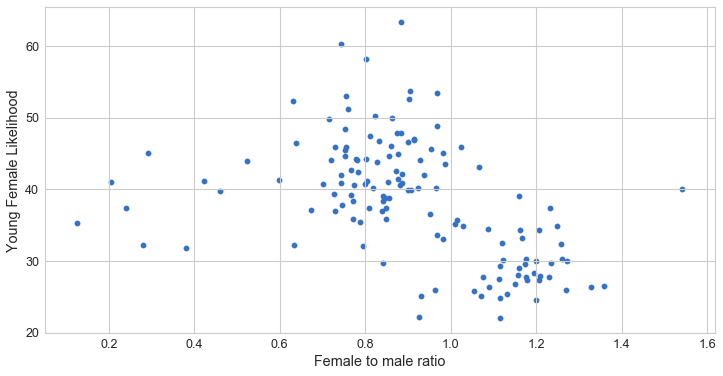

In [76]:
# plt.hist(df3['F2M_ratio'], weights = y_female)
plt.figure(figsize=(12, 6))
plt.xlabel('Female to male ratio')
plt.ylabel('Young Female Likelihood')

plt.scatter(df3['F2M_ratio'], df3['Young Women %'])
# plt.show()

In [80]:
# df3.plot( x='F2M_ratio', y='Young Women %', kind='hist')
# df3.set_index('F2M_ratio')['Young Women %'].plot.bar()
# plt.hist([df3['F2M_ratio'], df3['Young Women %']], bins = 20)
# df3.sort_values(by=['m_dist'], ascending=False)
# cutoff = np.hstack([np.array(df3.Min[0]), df3.Max.values])
# df3['Groups'] = pd.cut(df3['Young Women %'], bins=20, labels=labels, right=True, include_lowest=True)
# print (df3)

In [82]:
labels = ['B_class', 'M_class', 'U_class']
bins = [-5, -1, 1, 5]
df3['Class'] = pd.cut(df3['m_dist'], bins, labels = labels)


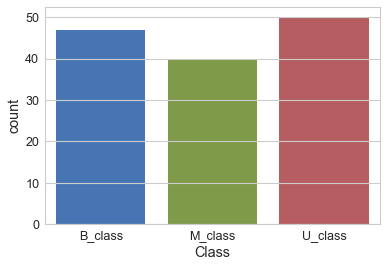

In [87]:
sns.countplot(df3['Class'])

In [94]:
labels = ['Low_ratio', 'Fair_ratio', 'High_ratio']
bins = [0, 0.6, 1.0, 2.0]
df3['F2M_cat'] = pd.cut(df3['F2M_ratio'], bins, labels = labels)

/home/kei0s/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


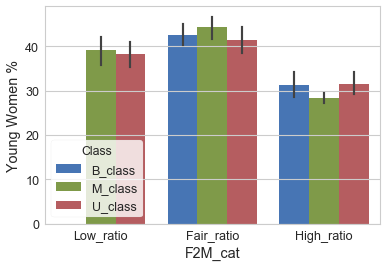

In [2]:
sns.barplot(x=df3['F2M_cat'], y=df3['Young Women %'], hue = df3['Class'])

In [3]:
df3.sort_values(by=['m_dist'])

,Locality,Part No,Male,Female,Coffee Shops,Salon,Buy/per sqft,Rent/per sqrt,Young Women %,distance,m_dist,F2M_ratio,Class,F2M_cat
86,INDERPURI,108,363,428,0,11,6500,25.000,27.336449,4.439937,-4.439937,1.179063,B_class,High_ratio
85,INDERPURI,107,350,403,1,10,6500,25.000,26.799007,3.926957,-3.926957,1.151429,B_class,High_ratio
89,INDERPURI,111,401,495,2,10,6500,25.000,29.696970,3.915606,-3.915606,1.234414,B_class,High_ratio
84,INDERPURI,106,401,466,1,8,6500,25.000,34.334764,3.023543,-3.023543,1.162095,B_class,High_ratio
88,INDERPURI,110,449,504,2,8,6500,25.000,30.158730,3.004380,-3.004380,1.122494,B_class,High_ratio
87,INDERPURI,109,419,493,2,8,6500,25.000,27.789047,3.004380,-3.004380,1.176611,B_class,High_ratio
94,INDERPURI,116,480,487,0,6,6500,25.000,35.728953,2.269047,-2.269047,1.014583,B_class,High_ratio
56,j j colony inderpuri,78,446,355,0,1,0,0.000,32.160000,1.377445,-1.377445,0.795964,B_class,Fair_ratio
55,j j colony inderpuri,77,427,299,0,1,0,0.000,40.760000,1.377445,-1.377445,0.700234,B_class,Fair_ratio
54,j j colony inderpuri,76,482,363,0,1,0,0.000,45.530000,1.377445,-1.377445,0.753112,B_class,Fair_ratio


limit_output extension: Maximum message size of 10000 exceeded with 21764 characters